In [3]:
visualize_data('inclusion')

Name            | xmin/ymin | xmax/ymax
inclusion       | (1442,   1) | (1700, 389)


<Figure size 640x480 with 1 Axes>

In [2]:
from utils import visualize_data

Name            | xmin/ymin | xmax/ymax
inclusion       | (1458, 724) | (1553, 780)


<Figure size 640x480 with 1 Axes>

In [1]:
from utils import create_sliding_video
create_sliding_video('./yolo_dataset/val/images/img_01_425005700_00156.jpg')

Sliding video created successfully.


In [1]:
import torch
from ultralytics import YOLO
model = YOLO('./project1/exp16/weights/best.pt')
model.val()

Ultralytics YOLOv8.0.139  Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning C:\Users\Ahmad Alsadeq\Documents\maher_document\Metallic-Surface-Defect-Detection\yolo_dataset\val\labels
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 143/143 [01:
                   all       2280       3542      0.846       0.87      0.909      0.582
                crease       2280         74      0.859      0.903      0.932      0.608
             silk_spot       2280        884      0.835      0.725      0.832      0.482
            water_spot       2280        352      0.936      0.895       0.97      0.713
            rolled_pit       2280         83      0.906      0.892      0.962      0.658
             inclusion       2280        344      0.755      0.642      0.748      0.391
          crescent_gap       2280        26

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FD7EE8A050>
fitness: 0.6147616447638383
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.60798,     0.48159,     0.71312,     0.65786,     0.39081,     0.71691,     0.38392,     0.65629,     0.60616,     0.60593])
names: {0: 'crease', 1: 'silk_spot', 2: 'water_spot', 3: 'rolled_pit', 4: 'inclusion', 5: 'crescent_gap', 6: 'welding_line', 7: 'punching_hole', 8: 'oil_spot', 9: 'waist_folding'}
plot: True
results_dict: {'metrics/precision(B)': 0.8462949670473179, 'metrics/recall(B)': 0.8695920303869104, 'metrics/mAP50(B)': 0.9090979330048212, 'metrics/mAP50-95(B)': 0.5820576127370625, 'fitness': 0.6147616447638383}
save_dir: WindowsPath('runs/detect/val2')
speed: {'preprocess': 0.4553681925

In [3]:
import cv2
model = YOLO('./project1/exp16/weights/best.pt')

res = model('./yolo_dataset/val/images/img_01_424995500_00289.jpg')
model = YOLO('./project1/exp16/weights/best.pt')

res_plotted = res[0].plot()
cv2.imshow("result", res_plotted)


image 1/1 C:\Users\Ahmad Alsadeq\Documents\maher_document\Metallic-Surface-Defect-Detection\yolo_dataset\val\images\img_01_424995500_00289.jpg: 640x640 1 water_spot, 27.9ms
Speed: 4.9ms preprocess, 27.9ms inference, 28.7ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO('./project1/exp16/weights/best.pt')

# Run batched inference on a list of images
results = model('./yolo_dataset/val/images/img_01_424995500_00289.jpg')

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Class probabilities for classification outputs
    


image 1/1 C:\Users\Ahmad Alsadeq\Documents\maher_document\Metallic-Surface-Defect-Detection\yolo_dataset\val\images\img_01_424995500_00289.jpg: 640x640 1 water_spot, 26.1ms
Speed: 2.0ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[3.8756e+02, 3.7271e-01, 5.2838e+02, 2.0905e+02, 8.5249e-01, 2.0000e+00]], device='cuda:0')
cls: tensor([2.], device='cuda:0')
conf: tensor([0.8525], device='cuda:0')
data: tensor([[3.8756e+02, 3.7271e-01, 5.2838e+02, 2.0905e+02, 8.5249e-01, 2.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[457.9700, 104.7099, 140.8181, 208.6743]], device='cuda:0')
xywhn: tensor([[0.7156, 0.1636, 0.2200, 0.3261]], device='cuda:0')
xyxy: tensor([[3.8756e+02, 3.7271e-01, 5.2838e+02, 2.0905e+02]], device='cuda:0')
xyxyn: tensor([[6.0556e-01, 5.8236e-04, 8.2559e-01, 3.2664e-01]], device='cuda:0')


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchinfo
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import DataLoader
import torchvision.transforms.v2 as transforms

from utils import construct_dataframe,visualize_data,read_xml
from dataset_module import DatasetModule


ModuleNotFoundError: No module named 'torchinfo'

In [115]:

# Load the entire dataset
df = construct_dataframe()
# pick the X and Y 
df = df [['img_path','labels']]
# Split the dataset into train and test sets

### 
#  | 'img_path'    | 'labels'
#  | 'c/.../x.png' | '[[class,xmin,xmax,ymin,ymax],[class,xmin,xmax,ymin,ymax],....[10,0,0,0,0]]'
##
train_df, test_df = train_test_split(df, shuffle = True,test_size=0.2, random_state=42)  # Adjust the test_size and random_state as needed

In [144]:
# Create instances of DatasetModule for train and test sets
train_dataset = DatasetModule(data_df=train_df, transform=None, target_transform=None)
test_dataset = DatasetModule(data_df=test_df, transform=None, target_transform=None)

train_dataloader = DataLoader(train_dataset, batch_size=5, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=5, shuffle=True)

Feature batch shape: torch.Size([5, 1000, 2048])


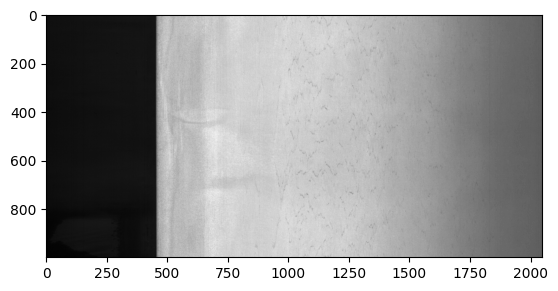

In [150]:
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
#print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
#label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()


In [24]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)



class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Model()
summary(model.cuda(),input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Linear-3                  [-1, 120]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------
